In [ ]:
# !pip install yfinance
import yfinance as yahooFinance

In [ ]:
GetRILInformation = yahooFinance.Ticker("Reliance.NS")

In [ ]:
#Get complete RIL data
# print(GetRILInformation.info)

# display Company Sector
print("Company Sector : ", GetRILInformation.info['sector'])
 
# display Price Earnings Ratio
print("Price Earnings Ratio : ", GetRILInformation.info['trailingPE'])
 
# display Company Beta
print(" Company Beta : ", GetRILInformation.info['beta'])

#Get key Value pairing
for key, value in GetRILInformation.info.items():
    print(key, ":", value)

In [ ]:
#print(GetRILInformation.history(period="5y"))
# Can also try - 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,5y, 10y and ytd.

In [ ]:
#Trying Moving Average

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import math

pd.set_option('mode.chained_assignment', None)

In [2]:
# Initialise the data 
long_MA = 200
short_MA = 17
#initial_wealth = '1000'
stock = 'Reliance.NS'
period = '5y'
startdate =  '2016-10-31'
enddate = '2022-07-31'
interval = '1d'
#totalprofit = 0

In [3]:
def get_stock_data(stock,startdate,enddate,period,interval):
        ticker = stock  
        yf.pdr_override()
        df = yf.download(tickers=stock, start=startdate, end=enddate, interval=interval,period=period)
        df.reset_index(inplace=True) 
        df['Date'] = df['Date'].dt.date
      
        return df
      
df = get_stock_data(stock,startdate,enddate,period,interval)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1418,2022-07-25,2467.449951,2467.449951,2403.000000,2420.399902,2420.399902,10665470
1419,2022-07-26,2421.100098,2443.899902,2411.350098,2421.500000,2421.500000,5216466
1420,2022-07-27,2419.949951,2427.000000,2402.000000,2419.199951,2419.199951,3994321
1421,2022-07-28,2436.000000,2467.949951,2421.000000,2457.100098,2457.100098,5766936
1422,2022-07-29,2474.699951,2517.100098,2464.000000,2509.449951,2509.449951,6982808


In [5]:
#Simple Moving Average

df['SMA3'] = df['Close'].rolling(3).mean()
df['SMA5'] = df['Close'].rolling(5).mean()
df['SMA9'] = df['Close'].rolling(9).mean()
df['SMA15'] = df['Close'].rolling(15).mean()
df['SMA30'] = df['Close'].rolling(30).mean()
# df.dropna(inplace=True)

In [6]:
## Exponential moving average
df['EMA3'] = df['Close'].ewm(span=3,adjust=False).mean()
df['EMA5'] = df['Close'].ewm(span=5,adjust=False).mean()
df['EMA9'] = df['Close'].ewm(span=9,adjust=False).mean()
df['EMA15'] = df['Close'].ewm(span=15,adjust=False).mean()
df['EMA30'] = df['Close'].ewm(span=30,adjust=False).mean()

In [9]:
df.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

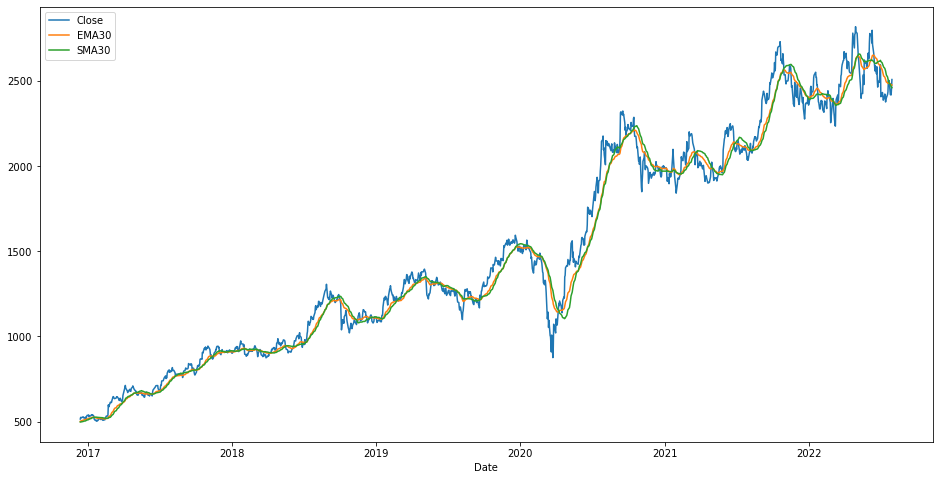

In [16]:
df.plot(kind = "line",x="Date",y=["Close","EMA30","SMA30"],figsize=(16,8) )

In [17]:
# df[[ 'EMA9', 'EMA15']].plot(label='RELIANCE',figsize=(16, 8))

In [19]:
## get 1d,5d,10d difference in price
df['1d_diff'] = df['Adj Close'].diff(periods=1)
df['5d_diff'] = df['Adj Close'].diff(periods=5)
df['10d_diff'] = df['Adj Close'].diff(periods=10)

In [ ]:
# #Cumulative Mean
# df['CMA30'] = df['Close'].expanding().mean()

In [21]:
df.dropna(inplace=True)

In [22]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA3,SMA5,SMA9,SMA15,SMA30,EMA3,EMA5,EMA9,EMA15,EMA30,1d_diff,5d_diff,10d_diff
39,2016-12-27,519.005371,528.539978,518.584351,527.351257,513.849670,8049872,523.281494,523.641418,523.735521,518.130314,505.079023,524.277819,523.618205,521.641435,517.800182,512.308395,8.325287,3.281860,12.017365
40,2016-12-28,528.936218,529.753479,518.633850,519.921692,506.610352,4447617,522.026733,522.299146,523.556661,519.799493,506.121641,522.099755,522.386034,521.297487,518.065371,512.799576,-7.239319,-6.539551,-4.729675
41,2016-12-29,520.070251,529.381958,519.822571,527.722717,514.211670,4048426,524.998556,523.497778,524.013441,521.298617,507.569583,524.911236,524.164928,522.582533,519.272539,513.762359,7.601318,5.839691,6.032837
42,2016-12-30,527.400757,537.405945,526.558777,536.118164,522.392090,7251073,527.920858,525.984216,525.105869,523.063556,509.136399,530.514700,528.149340,525.289659,521.378242,515.204669,8.180420,12.113800,12.186249
43,2017-01-02,536.910645,539.882446,531.140320,537.455444,523.695190,3275674,533.765442,529.713855,526.602790,524.975431,510.681750,533.985072,531.251375,527.722816,523.387893,516.640203,1.303101,18.170807,10.883179


In [26]:
df['Volume_100k'] = round(df['Volume']/10**5,3)

In [27]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA3,SMA5,SMA9,...,SMA30,EMA3,EMA5,EMA9,EMA15,EMA30,1d_diff,5d_diff,10d_diff,Volume_100k
1418,2022-07-25,2467.449951,2467.449951,2403.000000,2420.399902,2420.399902,10665470,2469.933350,2469.980029,2438.738905,...,2480.276668,2454.697504,2456.277747,2450.729008,2453.819271,2484.103313,-82.700195,-1.850098,-3.500000,106.655
1419,2022-07-26,2421.100098,2443.899902,2411.350098,2421.500000,2421.500000,5216466,2448.333333,2466.860010,2443.622233,...,2473.389998,2438.098752,2444.685164,2444.883206,2449.779362,2480.064390,1.100098,-15.600098,1.050049,52.165
1420,2022-07-27,2419.949951,2427.000000,2402.000000,2419.199951,2419.199951,3994321,2420.366618,2450.100000,2446.072238,...,2467.486662,2428.649352,2436.190093,2439.746555,2445.956936,2476.137652,-2.300049,-83.800049,41.649902,39.943
1421,2022-07-28,2436.000000,2467.949951,2421.000000,2457.100098,2457.100098,5766936,2432.600016,2444.260010,2452.216688,...,2464.056665,2442.874725,2443.160095,2443.217264,2447.349831,2474.909423,37.900146,-29.199951,59.950195,57.669
1422,2022-07-29,2474.699951,2517.100098,2464.000000,2509.449951,2509.449951,6982808,2461.916667,2445.529980,2461.905572,...,2461.371663,2476.162338,2465.256714,2456.463801,2455.112346,2477.137844,52.349854,6.349854,107.649902,69.828


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1384.0,1.518283e+03,6.347049e+02,503.725189,9.535983e+02,1.337398e+03,2.096962e+03,2.856150e+03
High,1384.0,1.536070e+03,6.419286e+02,509.569794,9.646684e+02,1.351613e+03,2.120000e+03,2.856150e+03
Low,1384.0,1.499495e+03,6.267154e+02,501.644897,9.400889e+02,1.317536e+03,2.073938e+03,2.786100e+03
Close,1384.0,1.517062e+03,6.338863e+02,503.180359,9.538336e+02,1.331008e+03,2.092900e+03,2.819850e+03
Adj Close,1384.0,1.507113e+03,6.395637e+02,490.297638,9.375166e+02,1.316895e+03,2.089035e+03,2.819850e+03
Volume,1384.0,1.006264e+07,7.436881e+06,787160.000000,5.699576e+06,7.852564e+06,1.144370e+07,6.584835e+07
SMA3,1384.0,1.515637e+03,6.335711e+02,505.293660,9.527522e+02,1.330373e+03,2.093729e+03,2.796850e+03
SMA5,1384.0,1.514251e+03,6.333650e+02,506.340399,9.536553e+02,1.328136e+03,2.097167e+03,2.788910e+03
SMA9,1384.0,1.511463e+03,6.329516e+02,509.817444,9.495520e+02,1.329927e+03,2.096279e+03,2.766544e+03
SMA15,1384.0,1.507290e+03,6.323761e+02,511.445345,9.420503e+02,1.318111e+03,2.094090e+03,2.706027e+03


In [31]:
df.to_csv("reliance_prices.csv",index=False)